In [1]:
from pathlib import Path
import pandas as pd
import numpy as np

from sklearn.naive_bayes import MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression #, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
from sklearn.metrics import roc_curve, accuracy_score, roc_auc_score

import statsmodels.api as sm

from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE
# from pygam import LinearGAM, s, f, l


# from dmba import classificationSummary

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
%cd /content/drive/MyDrive/github/NIS_sepsis

/content/drive/MyDrive/github/NIS_sepsis


In [3]:
try:
    import common
    DATA = common.dataDirectory()
except ImportError:
    DATA = Path().resolve() / 'data'

In [35]:
SEPSIS_TRAIN_TXT = DATA / 'df_small.zip'

In [5]:
SEPSIS_VAL_TXT = DATA / 'sepsis_validation_small.zip'

Load data

In [43]:
# import required modules
import zipfile
 
# read the dataset using the compression zip
df_train = pd.read_table(SEPSIS_TRAIN_TXT, delimiter = ' ' ,compression='zip')

# read the dataset using the compression zip
df_val = pd.read_table(SEPSIS_VAL_TXT, delimiter = ',' ,compression='zip')

In [41]:
df_train.columns.values

array(['AGE DIED ELECTIVE FEMALE RACE YEAR ZIPInc_Qrtl CHF NEURO CHRNLUNG HYPOTHY RENLFAIL LIVER LYMPH METS TUMOR ARTH OBESE WGHTLOSS DRUG PSYCH DEPRESS HTN_C SID29 c2 c21 c1 c3 c5 c6 c7 c8 c9 c10 c11 c14 c15 c16 c17 c18 c12 c13 HOSP_LOCTEACH PULMCIRC PERIVASC PARA dxccs_cat_p1 dxccs_cat_p2 dxccs_cat_p3 dxccs_cat_p4 dxccs_cat_p5 dxccs_cat_p6 dxccs_cat_p7 dxccs_cat_p8 dxccs_cat_p9 dxccs_cat_p10 dxccs_cat_p11 dxccs_cat_p12 dxccs_cat_p13 dxccs_cat_p14 dxccs_cat_p15 dxccs_cat_p16 dxccs_cat_p17 dxccs_cat_p18 dxccs_cat_p19 dxccs_cat_p20 dxccs_cat_p21 dxccs_cat_p22 dxccs_cat_p23 dxccs_cat_p24 dxccs_cat_p25 dxccs_cat_p26 dxccs_cat_p27 dxccs_cat_p28 dxccs_cat_p29 dxccs_cat_p30 dxccs_cat_p31 dxccs_cat_p32 dxccs_cat_p33 dxccs_cat_p34 dxccs_cat_p35 dxccs_cat_p36 dxccs_cat_p37 dxccs_cat_p38 dxccs_cat_p39 dxccs_cat_p40 dxccs_cat_p41 dxccs_cat_p42 dxccs_cat_p43 dxccs_cat_p44 dxccs_cat_p45 dxccs_cat_p46 dxccs_cat_p47 dxccs_cat_p48 dxccs_cat_p49 dxccs_cat_p50 dxccs_cat_p51 dxccs_cat_p52 dxccs_cat_p53 d

In [44]:
df_train.head()

,AGE,DIED,ELECTIVE,FEMALE,RACE,YEAR,ZIPInc_Qrtl,CHF,NEURO,CHRNLUNG,...,dxccs_cat_o655,dxccs_cat_o656,dxccs_cat_o657,dxccs_cat_o658,dxccs_cat_o659,dxccs_cat_o660,dxccs_cat_o661,dxccs_cat_o662,dxccs_cat_o663,dxccs_cat_o670
0,87,1,0,0,1.0,2014,3.0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,83,1,0,0,1.0,2012,4.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,85,0,0,0,2.0,2013,4.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,65,1,0,1,1.0,2012,3.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,88,1,0,0,1.0,2013,4.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
predictors = list(df_train.columns.values)
predictors.remove('DIED')
print(type(predictors))
outcome = 'DIED'

<class 'list'>


In [39]:
df_train.shape

(100, 1)

Outcome classes

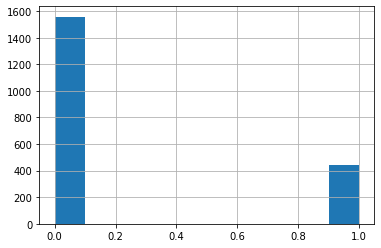

In [40]:
df_train[outcome].hist()

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Columns: 1323 entries, AGE to dxccs_cat_o670
dtypes: int64(1323)
memory usage: 20.2 MB


In [12]:
df_train.describe()

,AGE,DIED,ELECTIVE,FEMALE,RACE,ZIPInc_Qrtl,CHF,NEURO,CHRNLUNG,HYPOTHY,...,dxccs_cat_o655,dxccs_cat_o656,dxccs_cat_o657,dxccs_cat_o658,dxccs_cat_o659,dxccs_cat_o660,dxccs_cat_o661,dxccs_cat_o662,dxccs_cat_o663,dxccs_cat_o670
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.0,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000
mean,68.028000,0.221000,0.070000,0.494500,1.534000,2.340500,0.25650,0.152500,0.257000,0.135500,...,0.001000,0.0,0.138000,0.001000,0.02200,0.044500,0.040000,0.000500,0.202500,0.00250
std,16.570411,0.415024,0.255211,0.500095,1.072576,1.116774,0.43681,0.359595,0.437089,0.342342,...,0.031615,0.0,0.344986,0.031615,0.14672,0.206255,0.196008,0.022361,0.401963,0.04995
min,18.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,57.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,70.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,82.000000,0.000000,0.000000,1.000000,2.000000,3.000000,1.00000,0.000000,1.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
max,101.000000,1.000000,1.000000,1.000000,6.000000,4.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,0.0,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.00000


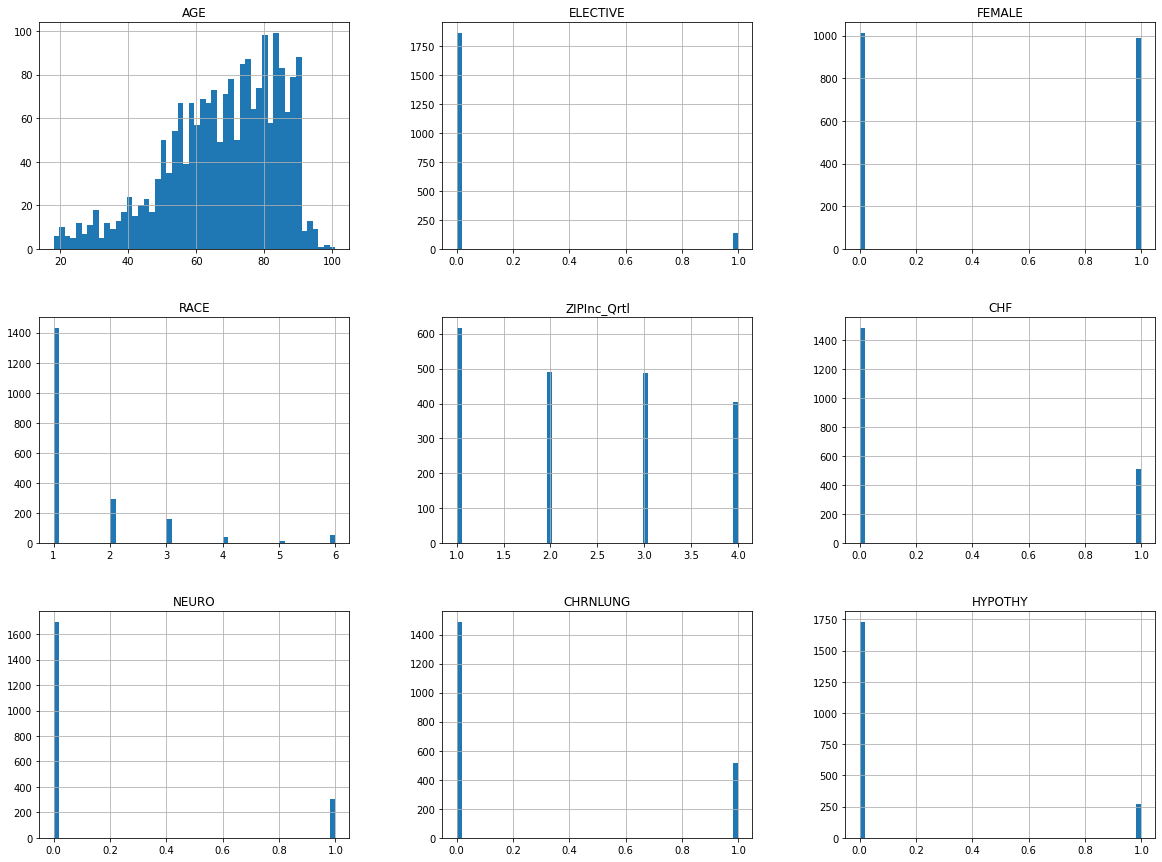

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
df_train[['AGE','ELECTIVE', 'FEMALE','RACE', 'ZIPInc_Qrtl', 'CHF', 'NEURO', 'CHRNLUNG', 'HYPOTHY']].hist(bins=50, figsize=(20,15))
plt.show()

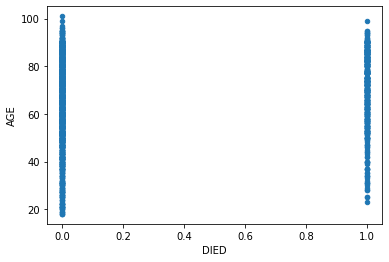

In [17]:
df_train.plot(kind='scatter', x='DIED',y='AGE')

# Training

In [10]:
X_train = df_train[predictors]
y_train = df_train[outcome]

X_val = df_val[predictors]
y_val = df_val[outcome]

Logistic regression
---

In [11]:
from sklearn.linear_model import LogisticRegression

logit_reg = LogisticRegression(penalty='l2', C=1e42, solver='liblinear')
logit_reg.fit(X_train, y_train)

print('intercept ', logit_reg.intercept_[0])
print('classes', logit_reg.classes_)
pd.DataFrame({'coeff': logit_reg.coef_[0]}, 
             index=X_train.columns)

intercept  -5.885084947327748
classes [0 1]


,coeff
AGE,0.035216
ELECTIVE,0.531213
FEMALE,0.411952
RACE,0.924531
ZIPInc_Qrtl,0.160776
...,...
dxccs_cat_o660,-4.102193
dxccs_cat_o661,-6.961485
dxccs_cat_o662,-3.732333
dxccs_cat_o663,0.613029


In [43]:
y_proba = logit_reg.predict_log_proba(X_val)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1700: RuntimeWarning: divide by zero encountered in log
  return np.log(self.predict_proba(X))


In [19]:
y_proba.shape

(2000, 2)

Lasso regression
---

In [49]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.1)

Random forest
---

In [ ]:
pass

XGBoost
---

In [ ]:
pass

Neural network
---

In [ ]:
pass

# Evaluating Classification Models

confusion matrix

In [22]:
confusion_matrix(y_val, logit_reg.predict(X_val))

array([[1385,  226],
       [ 219,  170]])

In [23]:
logit_reg.predict(X_val)

array([0, 1, 0, ..., 1, 1, 0])

Precision/ Recall/ f1 score

In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision_score(y_val, logit_reg.predict(X_val))

0.4292929292929293

In [25]:
recall_score(y_val, logit_reg.predict(X_val))

0.4370179948586118

In [28]:
f1_score(y_val, logit_reg.predict(X_val))

0.43312101910828027

ROC curve

In [17]:
type(logit_reg.predict_proba(X_val)[:, 0])

numpy.ndarray

In [15]:
type(y_val)

pandas.core.series.Series

In [26]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_val, logit_reg.predict_proba(X_val)[:, 1])


In [27]:
def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0,1],[0,1], 'k--') #Dashed diagonal

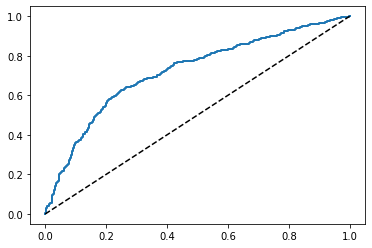

In [28]:
plot_roc_curve(fpr, tpr)
plt.show()

AUC

In [30]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val, logit_reg.predict_proba(X_val)[:, 1])

0.7214682476993803

PR trade off

In [47]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_val, logit_reg.predict_proba(X_val)[:, 1])

In [32]:
def plot_pr_curve_vs_threshold(precisions, recalls, thresholds):
  plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
  plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
  plt.plot([0,1],[0,1], 'k--') #Dashed diagonal

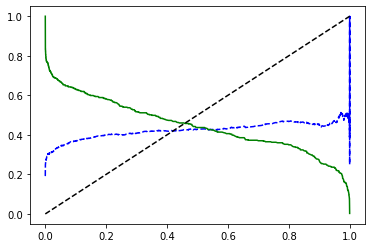

In [33]:
plot_pr_curve_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [45]:
def plot_pr_curve(precisions, recalls, label=None):
  plt.plot(precisions, recalls, linewidth=2, label=label)
  plt.plot([0,1],[0,1], 'k--') #Dashed diagonal

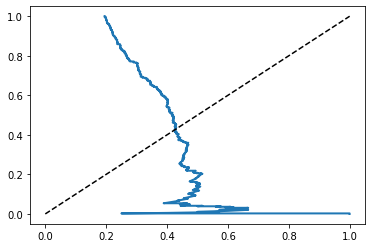

In [50]:
plot_pr_curve(precisions, recalls)
plt.show()

Module
---

In [76]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

def eval_model(y: list, X: list, model , model_name: str) -> np.array : 
    
    print(model_name)
    print('==================================================')
    mod = model
    print('Confusion Matrix: \n',confusion_matrix(y, mod.predict(X)))
    print('Precision: \n', precision_score(y, mod.predict(X)))
    print('Recall: \n', recall_score(y, mod.predict(X)))
    print('AUC: \n', roc_auc_score(y, logit_reg.predict_proba(X)[:, 1]))
    print('==================================================')


In [77]:
eval_model(y_val, X_val, logit_reg, 'Logistic regression')

logistic regression
Confusion Matrix: 
 [[1385  226]
 [ 219  170]]
Precision: 
 0.4292929292929293
Recall: 
 0.4370179948586118
AUC: 
 0.7214682476993803
